In [2]:
%matplotlib widget

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import sys

In [4]:
names=["TestID", "fuzzingOperationTimes", "staticCollision", "dynamicCollision", "cellTime", "FuzzingOpCount"]

In [5]:
res_col_subset=["fuzzingOperationTimes", "staticCollision", "dynamicCollision"]

In [6]:
# https://stackoverflow.com/questions/68522283/removing-dominated-rows-from-a-pandas-dataframe-rows-with-all-values-lower-th
def get_dominants(df):
    seen = [] # keep track of tested rows
    idx = df.index # initial index
    for i in range(len(df)+1):
        x = idx[0]
        if x in seen:   # done a full loop
            return df.loc[idx]
        seen.append(idx[0])
        # check which rows are dominated and drop them from the index
        idx = (df.loc[idx]-df.loc[x]).le(0).all(axis=1)
        # put tested row at the end
        idx = list(idx[~idx].index)+[x]

In [7]:
condbased_res960 = pd.read_csv("tts-res-condfuzz-python", delim_whitespace=True)
condbased_res250 = pd.read_csv("tts-history-condfuzz-250", delim_whitespace=True)
condbased_res500 = pd.read_csv("tts-history-condfuzz-500", delim_whitespace=True)
condbased_res750 = pd.read_csv("tts-history-condfuzz-750", delim_whitespace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'tts-res-condfuzz-python'

In [97]:
timebased_res = pd.read_csv("steppingcell-timebased-tts-cutdown", delim_whitespace=True, names=names, header=1)

In [102]:
def dominant_subset_cols(df):
    return get_dominants(df[res_col_subset])

In [1]:
timebased_res = pd.read_csv("steppingcell-timebased-tts-cutdown", delim_whitespace=True, names=names);
timebased_res.iloc[:,0]

NameError: name 'pd' is not defined

In [ ]:
condbased_res = pd.read_csv("steppingcell-condbased-tts-cutdown", delim_whitespace=True, names=names, header=0)
condbased_res

,TestID,fuzzingOperationTimes,staticCollision,dynamicCollision,cellTime,FuzzingOpCount
0,Test:Test_712_18_08_2023_18_53_57,-294.32,180.0,0.0,26.76,2
1,Test:Test_727_18_08_2023_19_52_26,-121.04,0.0,32.0,143.24,3
2,Test:Test_800_19_08_2023_00_49_35,-93.92,3.0,0.0,167.68,3
3,Test:Test_806_19_08_2023_00_49_35,-161.70,6.0,52.0,139.34,3
4,Test:Test_917_19_08_2023_09_06_28,-316.80,17.0,0.0,174.62,4
5,Test:Test_952_19_08_2023_11_14_46,-172.72,4.0,0.0,183.52,2
6,Test:Test_840_19_08_2023_02_51_12,-11.52,3.0,1.0,87.20,2
7,Test:Test_711_18_08_2023_18_53_57,-108.00,67.0,2.0,127.34,3
8,Test:Test_694_18_08_2023_17_55_53,-105.38,33.0,3.0,101.46,3
9,Test:Test_864_19_08_2023_04_54_24,-163.30,10.0,44.0,143.36,3


In [120]:
dominant_subset_cols(timebased_res)

,fuzzingOperationTimes,staticCollision,dynamicCollision
0,-0.011,0.0,0.0
1,-457.474,112.0,34.0
4,-209.453,200.0,0.0
5,-135.803,1.0,34.0
6,-363.858,135.0,6.0
7,-282.198,87.0,5.0
8,-350.329,116.0,2.0
9,-31.183,18.0,2.0
10,-80.557,6.0,20.0
11,-206.605,44.0,23.0


In [133]:
dominant_subset_cols(condbased_res)

,fuzzingOperationTimes,staticCollision,dynamicCollision
0,-294.32,180.0,0.0
1,-121.04,0.0,32.0
3,-161.70,6.0,52.0
6,-11.52,3.0,1.0
7,-108.00,67.0,2.0
8,-105.38,33.0,3.0
9,-163.30,10.0,44.0
12,-129.38,57.0,40.0
13,-12.04,151.0,0.0
14,-121.74,13.0,28.0


In [121]:
def plot_3d_resultset(df, df2, graph_title, savefigFilename,xrot,yrot):
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')    
    ax.view_init(xrot,yrot)
    ax.scatter(df["staticCollision"], df["dynamicCollision"], abs(df["fuzzingOperationTimes"]))
    
    if not (df2 is None):
        ax.scatter(df2["staticCollision"], df2["dynamicCollision"], abs(df2["fuzzingOperationTimes"]), color="green")

    ax.set_xlabel("Static collision metric")
    ax.set_ylabel("Dynamic collision metric")
    ax.set_zlabel("Fuzzing Operation Times")
    ax.set_title(graph_title)
    plt.tight_layout()
    plt.savefig(savefigFilename)
    plt.show()

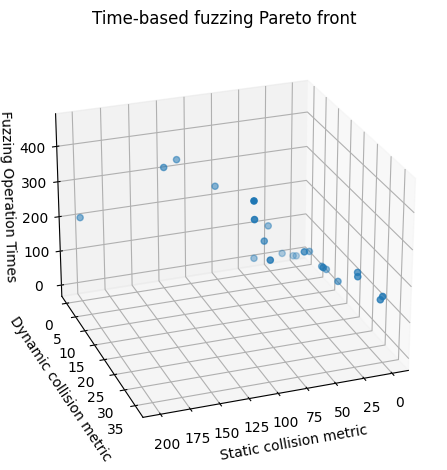

In [137]:
dtimebased = dominant_subset_cols(timebased_res)
plot_3d_resultset(dtimebased, None, "Time-based fuzzing Pareto front", "rq1-timebased-tts-3d-pareto.pdf", 25, 70)

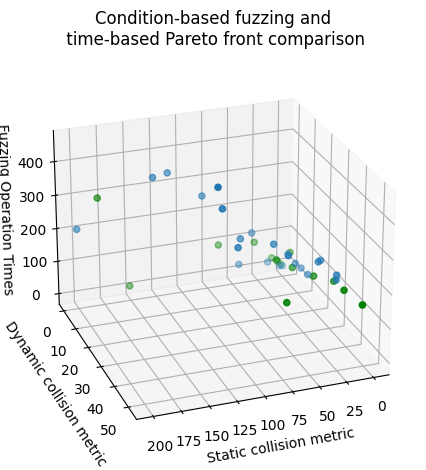

In [138]:
dcondbased = dominant_subset_cols(condbased_res)
plot_3d_resultset(dtimebased, dcondbased, "Condition-based fuzzing and\n time-based Pareto front comparison", "rq2-condbased-tts-3d-pareto.pdf", 25, 70)

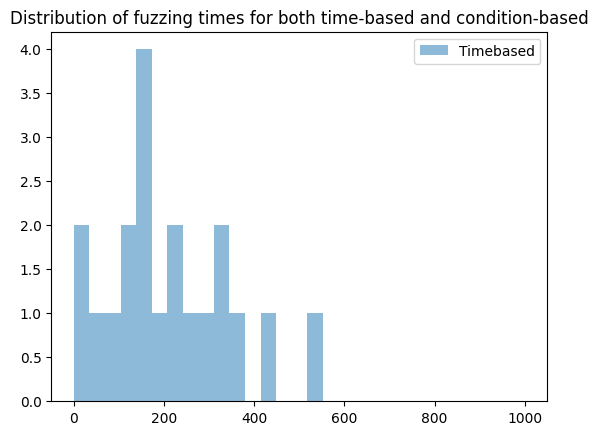

In [19]:
# Plot the times for condition-based fuzzing for both condition-based and time-based fuzzing
timebased_times = timebased_res["fuzzOpTimes"]

bins = np.linspace(0, 1000, 30)
plt.hist(timebased_times, bins, alpha=0.5, label='Timebased')
plt.title("Distribution of fuzzing times for both time-based and condition-based")
plt.legend(loc='upper right')
plt.show()


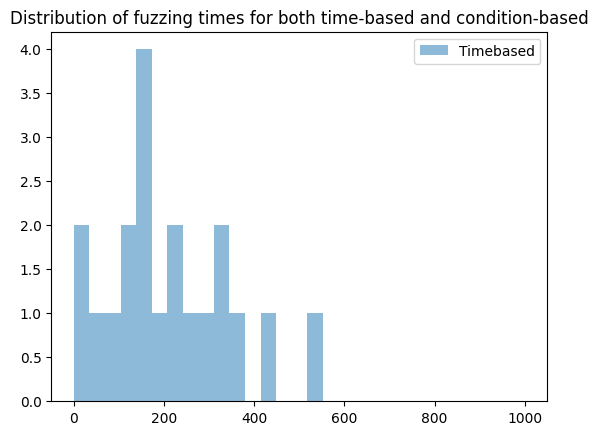

In [20]:
# Plot the times for condition-based fuzzing for both condition-based and time-based fuzzing
condbased_times = timebased_res["fuzzOpTimes"]

bins = np.linspace(0, 1000, 30)
plt.hist(condbased_times, bins, alpha=0.5, label='Timebased')
plt.title("Distribution of fuzzing times for both time-based and condition-based")
plt.legend(loc='upper right')
plt.show()


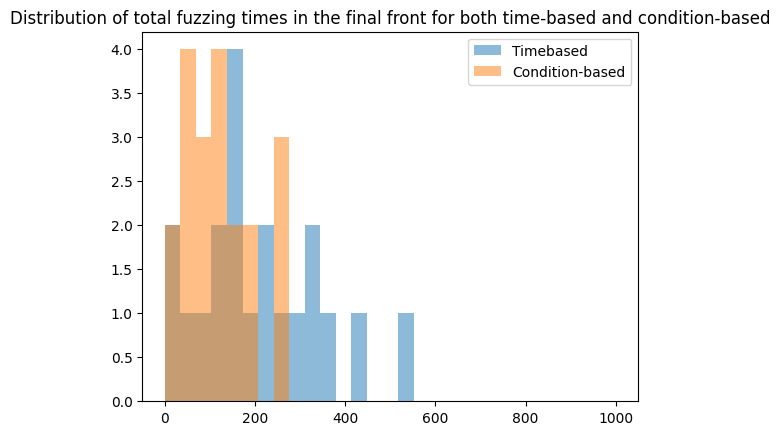

In [21]:
# Plot the times for condition-based fuzzing for both condition-based and time-based fuzzing
timebased_times = timebased_res["fuzzOpTimes"]
condbased_times = condbased_res["fuzzOpTimes"]

bins = np.linspace(0, 1000, 30)
plt.hist(timebased_times, bins, alpha=0.5, label='Timebased')
plt.hist(condbased_times, bins, alpha=0.5, label='Condition-based')
plt.title("Distribution of total fuzzing times in the final front for both time-based and condition-based")
plt.legend(loc='upper right')
plt.show()


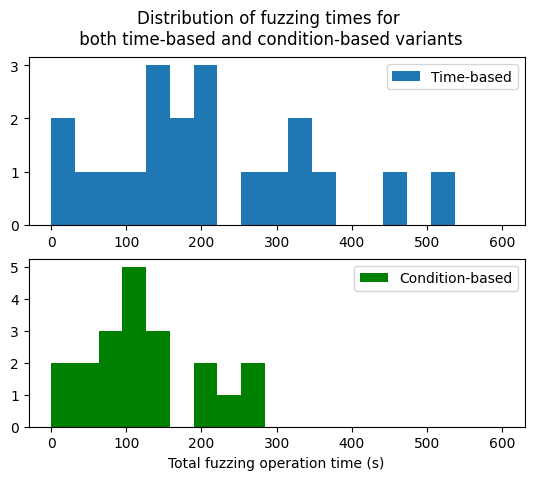

In [22]:
fig, axes = plt.subplots(2, 1)
# Plot the times for condition-based fuzzing for both condition-based and time-based fuzzing
timebased_times = timebased_res["fuzzOpTimes"]
condbased_times = condbased_res["fuzzOpTimes"]

plt.suptitle("Distribution of fuzzing times for\n both time-based and condition-based variants")
bins = np.linspace(0, 600, 20)
axes[0].hist(timebased_times, bins, alpha=1.0, label='Time-based')
axes[0].legend(loc='upper right')
#axes[0].set(xlabel="Total fuzzing operation time (s)")

axes[1].hist(condbased_times, bins, alpha=1.0, color="green", label='Condition-based')
axes[1].legend(loc='upper right')
axes[1].set(xlabel="Total fuzzing operation time (s)")
plt.savefig("rq2-fuzzing-times.pdf")
plt.show()


In [23]:
a = np.array([1,2,3])
b = np.array([4,5,6])
a / b

array([0.25, 0.4 , 0.5 ])

In [31]:
def get_metric_time_ratios(res_df, metric_dfname):
    metric_time_ratio = res_df[metric_dfname] / res_df["fuzzOpTimes"]
    return metric_time_ratio

In [38]:
timebased_ratios_human = get_metric_time_ratios(timebased_res, "uvExcessHuman")
condbased_ratios_human = get_metric_time_ratios(condbased_res, "uvExcessHuman")
timebased_ratios_surface = get_metric_time_ratios(timebased_res, "uvMissSurface")
condbased_ratios_surface = get_metric_time_ratios(condbased_res, "uvMissSurface")

In [35]:
def plot_relative_ratios(timebased_ratio, timebased_label, condbased_ratio, condbased_label, xlabel, xmax, fig_filename):
    fig, axes = plt.subplots(2, 1)
    # Plot the times for condition-based fuzzing for both condition-based and time-based fuzzing

    plt.suptitle("Distribution of fuzzing metric ratios\n for both time-based and condition-based variants")
    bins = np.linspace(0, xmax, 20)
    axes[0].hist(timebased_ratio, bins, alpha=1.0, label=timebased_label)
    axes[0].legend(loc='upper right')

    axes[1].hist(condbased_ratio, bins, alpha=1.0, color="green", label=condbased_label)
    axes[1].legend(loc='upper right')
    axes[1].set(xlabel=xlabel)
    plt.savefig(fig_filename)
    plt.show()

In [39]:
timebased_ratios_human

0     0.000000
1     0.000153
2     0.000000
3     0.000000
4     0.072692
5     0.104163
6     0.002042
7     0.019572
8     0.055988
9     0.016733
10    0.038756
11    0.059411
12    0.068014
13    0.000000
14    0.013984
15    0.060715
16    0.003221
17    0.012427
18    0.022497
19    0.025096
dtype: float64

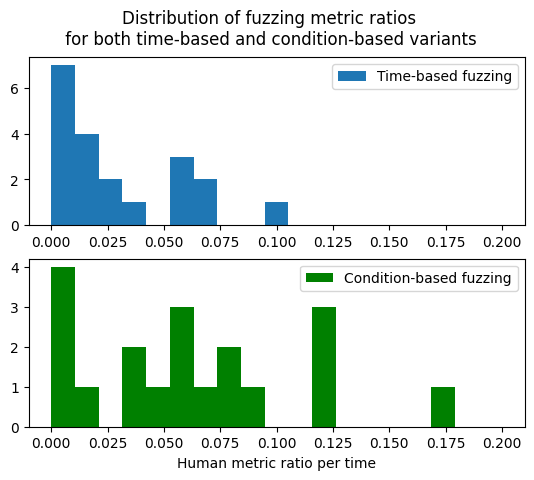

In [40]:
plot_relative_ratios(timebased_ratios_human, "Time-based fuzzing", condbased_ratios_human, "Condition-based fuzzing", "Human metric ratio per time", 0.2, "rq2_human_metric_ratio.pdf")


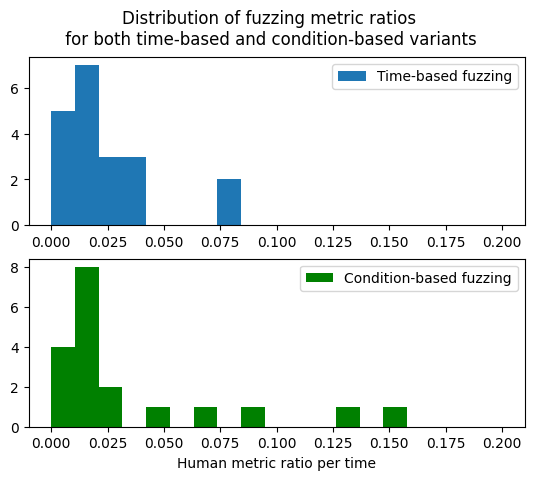

In [41]:
plot_relative_ratios(timebased_ratios_surface, "Time-based fuzzing", condbased_ratios_surface, "Condition-based fuzzing", "Human metric ratio per time", 0.2, "rq2_human_metric_ratio.pdf")